In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [ ]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Renaming the columns
df.columns = ['id', 'topic', 'sentiment', 'text']

In [ ]:
df.info()
df.isnull().sum()
df.dropna(inplace = True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   topic      74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,0
id,0
topic,0
sentiment,0
text,0


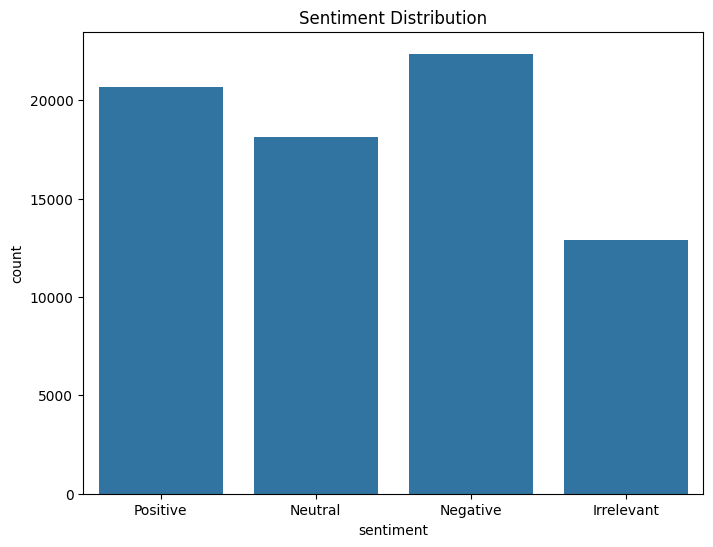

In [ ]:
mlt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
mlt.title('Sentiment Distribution')
mlt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
df['text_clean'] = df['text'].str.replace('[^\w\s]', '').str.lower()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3926961607.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['text_clean'] = df['text'].str.replace('[^\w\s]', '').str.lower()


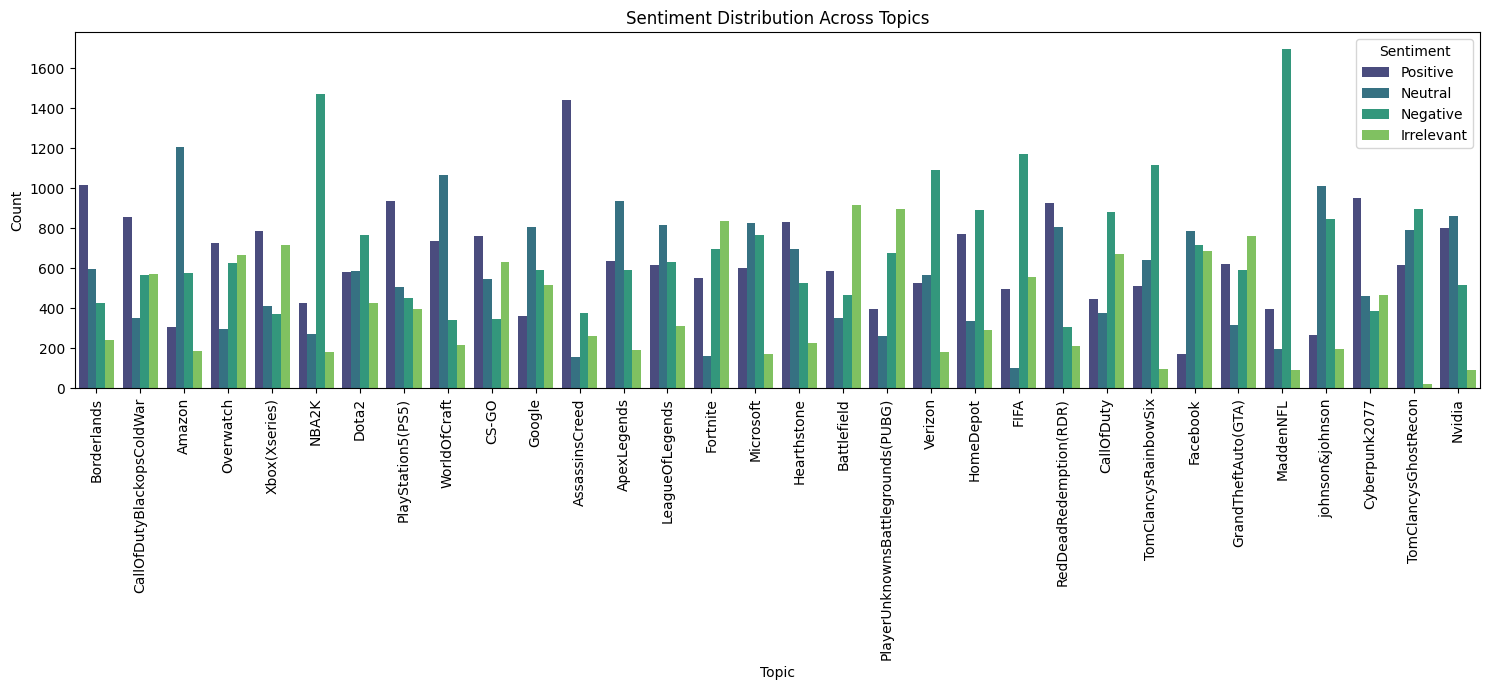

In [ ]:
mlt.figure(figsize=(15, 7))
sns.countplot(x='topic', hue='sentiment', data=df, palette='viridis')
mlt.title('Sentiment Distribution Across Topics')
mlt.xlabel('Topic')
mlt.ylabel('Count')
mlt.xticks(rotation=90)
mlt.legend(title='Sentiment')
mlt.tight_layout()
mlt.show()

In [18]:
X = df['text_clean']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.feature_extraction.text import CountVectorizer

# Assuming X_train and X_test are lists (or Series) of text documents
vectorizer = CountVectorizer()

# Fit the vectorizer on X_train and transform both X_train and X_test
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB()

In [19]:
# Make predictions
y_pred = model.predict(X_test_vect)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7536
              precision    recall  f1-score   support

  Irrelevant       0.84      0.63      0.72      2624
    Negative       0.71      0.86      0.77      4463
     Neutral       0.83      0.64      0.72      3589
    Positive       0.72      0.82      0.77      4123

    accuracy                           0.75     14799
   macro avg       0.78      0.74      0.75     14799
weighted avg       0.77      0.75      0.75     14799

